# ORIE 5257 Final Project


- Jane(Lingyi) Gu 
- Jingde Wan
- Jiehan(Lisbon) Wu
- Jiaming Yao
- Ellen(Hanyu) Zhang


## EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = 'RfqData2023.xlsx'


In [3]:
data_IS = pd.read_excel(data, sheet_name=pd.ExcelFile(data).sheet_names[0])
data_OOS= pd.read_excel(data, sheet_name=pd.ExcelFile(data).sheet_names[1])
data_NEW = pd.read_excel(data, sheet_name=pd.ExcelFile(data).sheet_names[2])

In [4]:
data_IS

Time    Bond   Side  Notional Counterparty  MidPrice  QuotedPrice  \
0     25000  Bond_2    Bid      1000       Ctpy_0    87.740       87.700   
1     25001  Bond_0    Bid     80000       Ctpy_2    99.195       99.195   
2     25002  Bond_0  Offer      1000       Ctpy_0    99.095       99.115   
3     25003  Bond_0  Offer   2630000       Ctpy_3    99.295       99.305   
4     25004  Bond_0  Offer      1000       Ctpy_2    99.435       99.445   
...     ...     ...    ...       ...          ...       ...          ...   
4995  29995  Bond_0  Offer     10000       Ctpy_1   102.985      103.025   
4996  29996  Bond_0  Offer      1000       Ctpy_1   103.025      103.135   
4997  29997  Bond_2    Bid      1000       Ctpy_1    68.300       68.200   
4998  29998  Bond_0  Offer      1000       Ctpy_0   103.175      103.275   
4999  29999  Bond_0    Bid      1000       Ctpy_1   103.275      103.225   

      Competitors  Traded  NextMidPrice      PL  
0               4    DONE        87.910     2.1  
1               4    DONE        99.095   -80.0  
2               2    DONE        99.295    -1.8  
3               3    DONE        99.435 -3419.0  
4               3    DONE        99.525    -0.8  
...           ...     ...           ...     ...  
4995            2    DONE       103.025     0.0  
4996            2  MISSED       103.035     0.0  
4997            4    DONE        68.250     0.5  
4998            2  MISSED       103.275     0.0  
4999            3  MISSED       103.245     0.0  

[5000 rows x 11 columns]

In [5]:
data_OOS

Time    Bond   Side  Notional Counterparty  MidPrice  QuotedPrice  \
0    30000  Bond_2  Offer      1000       Ctpy_1    67.700       67.790   
1    30001  Bond_0  Offer      1000       Ctpy_1   103.055      103.125   
2    30002  Bond_2    Bid      1000       Ctpy_1    68.040       67.900   
3    30003  Bond_0    Bid      1000       Ctpy_1   102.945      102.915   
4    30004  Bond_0    Bid      1000       Ctpy_0   102.895      102.865   
..     ...     ...    ...       ...          ...       ...          ...   
995  30995  Bond_1    Bid  10000000       Ctpy_0   130.341      130.321   
996  30996  Bond_1  Offer      1000       Ctpy_0   130.161      130.221   
997  30997  Bond_1  Offer      1000       Ctpy_0   130.161      130.271   
998  30998  Bond_0    Bid      1000       Ctpy_1    98.715       98.695   
999  30999  Bond_2    Bid  10000000       Ctpy_0    66.420       66.380   

     Competitors  Traded  NextMidPrice  PL  
0              4     NaN        67.740 NaN  
1              3     NaN       103.035 NaN  
2              1     NaN        68.340 NaN  
3              1     NaN       102.895 NaN  
4              2     NaN       103.095 NaN  
..           ...     ...           ...  ..  
995            2     NaN       130.161 NaN  
996            3     NaN       130.161 NaN  
997            4     NaN       130.051 NaN  
998            4     NaN        98.685 NaN  
999            4     NaN        66.040 NaN  

[1000 rows x 11 columns]

In [6]:
data_NEW

Time    Bond   Side  Notional Counterparty  MidPrice  QuotedPrice  \
0  31001  Bond_0  Offer     60000       Ctpy_0    98.695          NaN   
1  31002  Bond_2    Bid      1000       Ctpy_3    65.820          NaN   
2  31015  Bond_0    Bid      1000       Ctpy_0    99.635          NaN   
3  31023  Bond_2  Offer    250000       Ctpy_0    67.180          NaN   
4  31033  Bond_0  Offer      1000       Ctpy_1    98.955          NaN   
5  31039  Bond_1    Bid  10000000       Ctpy_0   129.271          NaN   
6  31042  Bond_2    Bid     20000       Ctpy_1    66.650          NaN   
7  31044  Bond_0  Offer      1000       Ctpy_3    98.905          NaN   
8  31094  Bond_2  Offer      1000       Ctpy_1    66.370          NaN   
9  31099  Bond_0    Bid      1000       Ctpy_0    99.205          NaN   

   Competitors  Traded  NextMidPrice  PL  
0            1     NaN           NaN NaN  
1            3     NaN           NaN NaN  
2            1     NaN           NaN NaN  
3            4     NaN           NaN NaN  
4            4     NaN           NaN NaN  
5            3     NaN           NaN NaN  
6            3     NaN           NaN NaN  
7            4     NaN           NaN NaN  
8            4     NaN           NaN NaN  
9            3     NaN           NaN NaN

In [7]:
data_EDA = data_IS.copy()

data_EDA['NextMidPriceDiff'] = data_EDA['NextMidPrice'] - data_EDA['MidPrice']

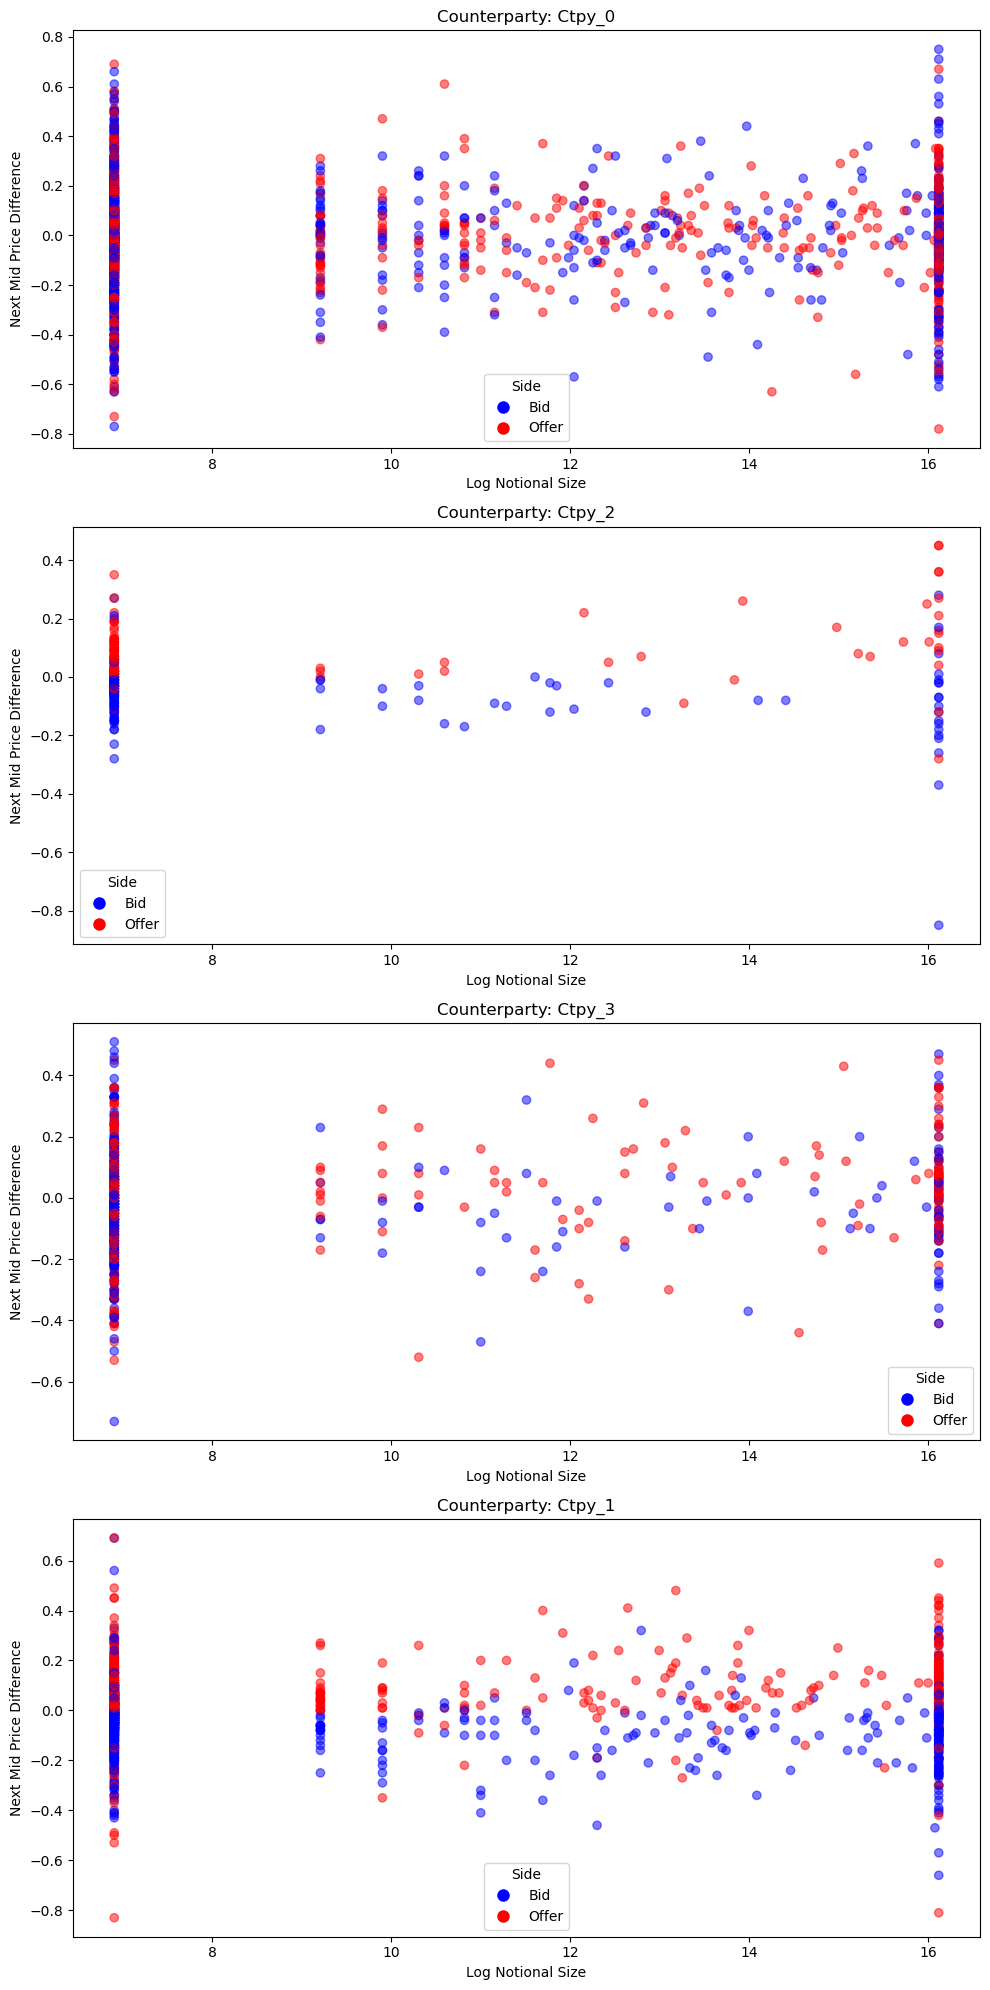

In [8]:
counterparties = data_EDA['Counterparty'].unique()

num_counterparties = len(counterparties)

color_map = {'Bid': 'blue', 'Offer': 'red'}

# Create subplots
fig, axes = plt.subplots(num_counterparties, 1, figsize=(10, num_counterparties * 5))

# If there's only one counterparty, we need to wrap axes in an array so that we can iterate over it
if num_counterparties == 1:
    axes = [axes]

for ax, counterparty in zip(axes, counterparties):
    ctpy_data = data_EDA[data_EDA['Counterparty'] == counterparty]
    # Scatter plot
    colors = ctpy_data['Side'].map(color_map)
    scatter = ax.scatter(np.log(ctpy_data['Notional']), ctpy_data['NextMidPriceDiff'], alpha=0.5, c=colors)
    
    legend_labels = {'Bid': 'blue', 'Offer': 'red'}
    handles = [plt.Line2D([0], [0], marker='o', color='w', label=key,
                          markerfacecolor=val, markersize=10) for key, val in legend_labels.items()]
    ax.legend(handles=handles, title='Side')

    ax.set_title(f'Counterparty: {counterparty}')
    ax.set_xlabel('Log Notional Size')
    ax.set_ylabel('Next Mid Price Difference')

plt.tight_layout()
plt.show()


Counterparty 1 and 2 seem more toxic/informed traders

# TASK 1: Classification

In [9]:
#!git clone https://github.com/UBS-IB/adaptive-bayesian-reticulum

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neural_network import MLPClassifier,MLPRegressor

import numpy as np
import datetime


from reticulum import AdaptiveBayesianReticulum

In [11]:
def fit_encoder(df):
    encoder = OneHotEncoder(drop='first') 
    encoder.fit(df[['Bond', 'Counterparty']])
    return encoder

In [12]:
def process_data(df, encoder):
    df_processed = df.copy()
    df_processed['Spread'] = np.where(df_processed['Side'] == 'Bid', 
                                      (df_processed['MidPrice'] - df_processed['QuotedPrice']), 
                                      (df_processed['QuotedPrice'] - df_processed['MidPrice']))
    df_processed['Log Notional'] = np.log(df_processed['Notional'])

    # 使用训练集上定义的编码器来转换数据
    categorical_features = encoder.transform(df_processed[['Bond', 'Counterparty']]).toarray()
    categorical_feature_names = encoder.get_feature_names_out(['Bond', 'Counterparty'])

    encoded_df = pd.DataFrame(categorical_features, columns=categorical_feature_names)

    df_processed = df_processed.drop(['Bond', 'Counterparty', 'Side', 'Notional'], axis=1)
    df_processed = pd.concat([df_processed, encoded_df], axis=1)
    df_final = df_processed.drop(['Time', 'MidPrice', 'QuotedPrice', 'NextMidPrice', 'PL'], axis=1)

    return df_final


In [13]:
# def process_data(df):
#     df_processed = df.copy()
#     df_processed['Spread'] = np.where(df_processed['Side'] == 'Bid', 
#                                       (df_processed['MidPrice'] - df_processed['QuotedPrice']), 
#                                       (df_processed['QuotedPrice'] - df_processed['MidPrice']))
#     df_processed['Log Notional'] = np.log(df_processed['Notional'])
    
    
#     # One-hot encoding for categorical variables 'Bond' and 'Counterparty'
#     encoder = OneHotEncoder(drop='first')  # drop='first' to avoid the dummy variable trap
#     categorical_features = encoder.fit_transform(df_processed[['Bond', 'Counterparty']]).toarray()
#     #categorical_feature_names = encoder.get_feature_names_out(['Bond', 'Counterparty'])
#     categorical_feature_names = encoder.get_feature_names(['Bond', 'Counterparty'])

#     encoded_df = pd.DataFrame(categorical_features, columns=categorical_feature_names)

#     df_processed = df_processed.drop(['Bond', 'Counterparty', 'Side', 'Notional'], axis=1)  # drop the original categorical columns and 'Side'
#     df_processed = pd.concat([df_processed, encoded_df], axis=1)

    
#     df_final = df_processed.drop(['Time', 'MidPrice', 'QuotedPrice', 'NextMidPrice', 'PL'], axis=1)
    
    
#     return df_final

In [14]:
encoder = fit_encoder(data_IS)
data_IS_processed = process_data(data_IS, encoder)
data_IS_processed

Competitors  Traded  Spread  Log Notional  Bond_Bond_1  Bond_Bond_2  \
0               4    DONE    0.04      6.907755          0.0          1.0   
1               4    DONE    0.00     11.289782          0.0          0.0   
2               2    DONE    0.02      6.907755          0.0          0.0   
3               3    DONE    0.01     14.782494          0.0          0.0   
4               3    DONE    0.01      6.907755          0.0          0.0   
...           ...     ...     ...           ...          ...          ...   
4995            2    DONE    0.04      9.210340          0.0          0.0   
4996            2  MISSED    0.11      6.907755          0.0          0.0   
4997            4    DONE    0.10      6.907755          0.0          1.0   
4998            2  MISSED    0.10      6.907755          0.0          0.0   
4999            3  MISSED    0.05      6.907755          0.0          0.0   

      Counterparty_Ctpy_1  Counterparty_Ctpy_2  Counterparty_Ctpy_3  
0                     0.0                  0.0                  0.0  
1                     0.0                  1.0                  0.0  
2                     0.0                  0.0                  0.0  
3                     0.0                  0.0                  1.0  
4                     0.0                  1.0                  0.0  
...                   ...                  ...                  ...  
4995                  1.0                  0.0                  0.0  
4996                  1.0                  0.0                  0.0  
4997                  1.0                  0.0                  0.0  
4998                  0.0                  0.0                  0.0  
4999                  1.0                  0.0                  0.0  

[5000 rows x 9 columns]

In [15]:
# Prepare the features (X) and the outcome variable (y)
# data_IS_processed = process_data(data_IS)
X_IS = data_IS_processed.drop(['Traded'], axis=1)
y_IS = data_IS_processed['Traded']

# Split the data into train and test sets
X_train, X_val, y_train, y_val = train_test_split(X_IS, y_IS, test_size=0.2, random_state=42)

In [16]:
X_IS.shape

(5000, 8)

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

### Model comparison: Reticulum

In [20]:
ABR = AdaptiveBayesianReticulum()
param_grid = {
    'prior': [(1,1)],
    'pruning_factor': [1.01, 1.05],
    'n_iter': [100, 200],
    'learning_rate_init': [0.001, 0.05, 0.1],
    'n_gradient_descent_steps': [1, 10, 100],
    'initial_relative_stiffness' : [20]
}

search = RandomizedSearchCV(estimator=ABR, param_distributions=param_grid, n_iter=20, cv=2, scoring='accuracy')

search.fit(X_train, y_train)

print("Best Parameters:", search.best_params_)

accuracy_train = search.score(X_train, y_train)
accuracy_val = search.score(X_val, y_val)
print(f'Train:  accuracy = {100*accuracy_train:.4f} %')
print(f'Val: accuracy = {100*accuracy_val:.4f} %')

In [18]:
best_ABR = AdaptiveBayesianReticulum(pruning_factor= 1.05, 
                                      prior = (1, 1), 
                                      n_iter = 200, 
                                      n_gradient_descent_steps = 100, 
                                      learning_rate_init = 0.1, 
                                      initial_relative_stiffness = 20)

### Model Comparison: MLP

In [48]:
MLP = MLPClassifier()
param_grid = {
    'hidden_layer_sizes': [(11,11,11), (30,), (50,), (20, 20)],
    'activation': ['relu', 'tanh', 'logistic'],
    'max_iter': [500],
}
   
search = RandomizedSearchCV(estimator=MLP, param_distributions=param_grid, n_iter=8, cv=2, scoring='accuracy')

search.fit(X_train, y_train)

print("Best Parameters:", search.best_params_)

accuracy_train = search.score(X_train, y_train)
accuracy_val = search.score(X_val, y_val)
print(f'Train:  accuracy = {100*accuracy_train:.4f} %')
print(f'Val: accuracy = {100*accuracy_val:.4f} %')

Best Parameters: {'max_iter': 500, 'hidden_layer_sizes': (11, 11, 11), 'activation': 'tanh'}
Train:  accuracy = 88.2500 %
Val: accuracy = 88.9000 %


In [19]:
best_MLP = MLPClassifier( max_iter = 500,  
                         hidden_layer_sizes = (11, 11, 11),  
                         activation =  'tanh' )

### Model Comparison: Logistic Regression

In [54]:
# Initialize the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)

# Train the model
logreg.fit(X_train, y_train)

# Predict on the val set
y_pred = logreg.predict(X_val)

accuracy_train = accuracy_score(y_train, logreg.predict(X_train))
accuracy_val = accuracy_score(y_val, logreg.predict(X_val))

print(f'Train:  accuracy = {100*accuracy_train:.4f} %')
print(f'Val: accuracy = {100*accuracy_val:.4f} %')

# Evaluate the model
report = classification_report(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)
#print(report)
print(conf_matrix)

Train:  accuracy = 85.5500 %
Val: accuracy = 85.8000 %
[[475  52]
 [ 90 383]]


In [20]:
Logit = LogisticRegression(max_iter=1000)

## OOS Test

In [21]:
# encoder = fit_encoder(data_OOS)
data_OOS_processed = process_data(data_OOS, encoder)
data_OOS_processed.head()

Competitors  Traded  Spread  Log Notional  Bond_Bond_1  Bond_Bond_2  \
0            4     NaN    0.09      6.907755          0.0          1.0   
1            3     NaN    0.07      6.907755          0.0          0.0   
2            1     NaN    0.14      6.907755          0.0          1.0   
3            1     NaN    0.03      6.907755          0.0          0.0   
4            2     NaN    0.03      6.907755          0.0          0.0   

   Counterparty_Ctpy_1  Counterparty_Ctpy_2  Counterparty_Ctpy_3  
0                  1.0                  0.0                  0.0  
1                  1.0                  0.0                  0.0  
2                  1.0                  0.0                  0.0  
3                  1.0                  0.0                  0.0  
4                  0.0                  0.0                  0.0

In [22]:
X_OOS = data_OOS_processed.drop(['Traded'], axis=1)
X_OOS.shape

(1000, 8)

In [23]:
X_IS.shape

(5000, 8)

In [24]:
scaler = StandardScaler()
X_IS = scaler.fit_transform(X_IS)
X_OOS = scaler.transform(X_OOS)

#### Choose which model to use, according to the performance presented above

In [25]:
model = best_ABR
# model = best_MLP
# model = Logit

In [26]:
model.fit(X_IS, y_IS)

origin=[ 5.46112991e-02, -5.15820092e-01,  5.51103905e-03,  1.86142081e-02,  4.07874380e-02,  7.47851812e-03, -4.46881141e-02, -4.26414866e-04], normal=[-3.77046506e+01,  3.56131728e+02, -3.80492325e+00, -1.28515935e+01, -2.81604013e+01, -5.16330718e+00,  3.08535002e+01,  2.94404707e-01]
├─ left: origin=[-0.00450686, -0.06922064,  0.00657232,  0.00707072,  0.02531754,  0.00575281, -0.01917656,  0.00510551], normal=[  32.14249994,  493.67550654,  -46.87321212,  -50.42774350, -180.56250435,  -41.02854267,  136.76556351,  -36.41205331]
│  ├─ left: origin=[-0.00511114,  0.09520671, -0.01129219,  0.00446972, -0.04399999, -0.00584504,  0.00563759, -0.00414686], normal=[ -22.24309625,  414.32842745,  -49.14229748,   19.45171110, -191.48280021,  -25.43694686,   24.53415032,  -18.04663007]
│  │  ├─ left: origin=[ 0.10082033,  0.16969373, -0.14001537,  0.23413803, -0.23822437, -0.01026745,  0.22764024,  0.05622019], normal=[  74.22915317,  124.93732088, -103.08657560,  172.38455217, -175.3931272

In [27]:
# Predict on the test set
data_OOS['Traded'] = model.predict(X_OOS)
data_OOS['HitRatio'] = model.predict_proba(X_OOS)[:, 0]
data_OOS

Time    Bond   Side  Notional Counterparty  MidPrice  QuotedPrice  \
0    30000  Bond_2  Offer      1000       Ctpy_1    67.700       67.790   
1    30001  Bond_0  Offer      1000       Ctpy_1   103.055      103.125   
2    30002  Bond_2    Bid      1000       Ctpy_1    68.040       67.900   
3    30003  Bond_0    Bid      1000       Ctpy_1   102.945      102.915   
4    30004  Bond_0    Bid      1000       Ctpy_0   102.895      102.865   
..     ...     ...    ...       ...          ...       ...          ...   
995  30995  Bond_1    Bid  10000000       Ctpy_0   130.341      130.321   
996  30996  Bond_1  Offer      1000       Ctpy_0   130.161      130.221   
997  30997  Bond_1  Offer      1000       Ctpy_0   130.161      130.271   
998  30998  Bond_0    Bid      1000       Ctpy_1    98.715       98.695   
999  30999  Bond_2    Bid  10000000       Ctpy_0    66.420       66.380   

     Competitors  Traded  NextMidPrice  PL  HitRatio  
0              4    DONE        67.740 NaN  0.687197  
1              3  MISSED       103.035 NaN  0.027628  
2              1  MISSED        68.340 NaN  0.027628  
3              1  MISSED       102.895 NaN  0.124669  
4              2  MISSED       103.095 NaN  0.179628  
..           ...     ...           ...  ..       ...  
995            2    DONE       130.161 NaN  0.997231  
996            3  MISSED       130.161 NaN  0.007382  
997            4  MISSED       130.051 NaN  0.007382  
998            4    DONE        98.685 NaN  0.958722  
999            4    DONE        66.040 NaN  0.958721  

[1000 rows x 12 columns]

In [28]:
def calc_PL(row):
    if row['Traded'] != 'DONE':
        return 0
    else:
        if row['Side'] == 'Bid':
            return (row['NextMidPrice'] - row['QuotedPrice'])* row['Notional']
        else:
            return (row['QuotedPrice'] - row['NextMidPrice'])* row['Notional']

In [29]:
data_OOS['PL'] = data_OOS.apply(calc_PL, axis=1)
incorrect_pl_rows = data_OOS[(data_OOS['Traded'] != 'DONE') & (data_OOS['PL'] != 0)]
assert len(incorrect_pl_rows)==0

In [31]:
data_OOS

Time    Bond   Side  Notional Counterparty  MidPrice  QuotedPrice  \
0    30000  Bond_2  Offer      1000       Ctpy_1    67.700       67.790   
1    30001  Bond_0  Offer      1000       Ctpy_1   103.055      103.125   
2    30002  Bond_2    Bid      1000       Ctpy_1    68.040       67.900   
3    30003  Bond_0    Bid      1000       Ctpy_1   102.945      102.915   
4    30004  Bond_0    Bid      1000       Ctpy_0   102.895      102.865   
..     ...     ...    ...       ...          ...       ...          ...   
995  30995  Bond_1    Bid  10000000       Ctpy_0   130.341      130.321   
996  30996  Bond_1  Offer      1000       Ctpy_0   130.161      130.221   
997  30997  Bond_1  Offer      1000       Ctpy_0   130.161      130.271   
998  30998  Bond_0    Bid      1000       Ctpy_1    98.715       98.695   
999  30999  Bond_2    Bid  10000000       Ctpy_0    66.420       66.380   

     Competitors  Traded  NextMidPrice         PL  HitRatio  
0              4    DONE        67.740       50.0  0.687197  
1              3  MISSED       103.035        0.0  0.027628  
2              1  MISSED        68.340        0.0  0.027628  
3              1  MISSED       102.895        0.0  0.124669  
4              2  MISSED       103.095        0.0  0.179628  
..           ...     ...           ...        ...       ...  
995            2    DONE       130.161 -1600000.0  0.997231  
996            3  MISSED       130.161        0.0  0.007382  
997            4  MISSED       130.051        0.0  0.007382  
998            4    DONE        98.685      -10.0  0.958722  
999            4    DONE        66.040 -3400000.0  0.958721  

[1000 rows x 12 columns]

In [32]:
data_OOS.to_csv('RFQ_OOS.csv')

# TASK II: Quoting

##  Generate hit ratio

In [33]:
def calc_total_PL(df, threshold):
    total_PL = df[df['HitRatio'] <= threshold]['PL'].sum() #??????
    return total_PL

In [34]:
unique_bonds = data_OOS['Bond'].unique()
unique_counterparties = data_OOS['Counterparty'].unique()
combinations = [(bond, ctpy) for bond in unique_bonds for ctpy in unique_counterparties]
combinations

[('Bond_2', 'Ctpy_1'),
 ('Bond_2', 'Ctpy_0'),
 ('Bond_2', 'Ctpy_3'),
 ('Bond_2', 'Ctpy_2'),
 ('Bond_0', 'Ctpy_1'),
 ('Bond_0', 'Ctpy_0'),
 ('Bond_0', 'Ctpy_3'),
 ('Bond_0', 'Ctpy_2'),
 ('Bond_1', 'Ctpy_1'),
 ('Bond_1', 'Ctpy_0'),
 ('Bond_1', 'Ctpy_3'),
 ('Bond_1', 'Ctpy_2')]

### Ctpy

Ctpy_1
0.6900000000000001


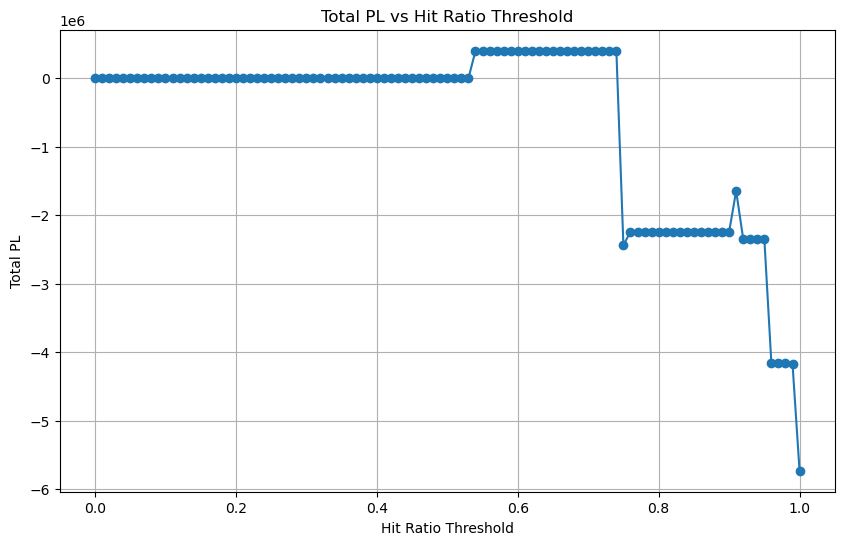

Ctpy_0
0.79


Ctpy_3
1.0


Ctpy_2
0.0


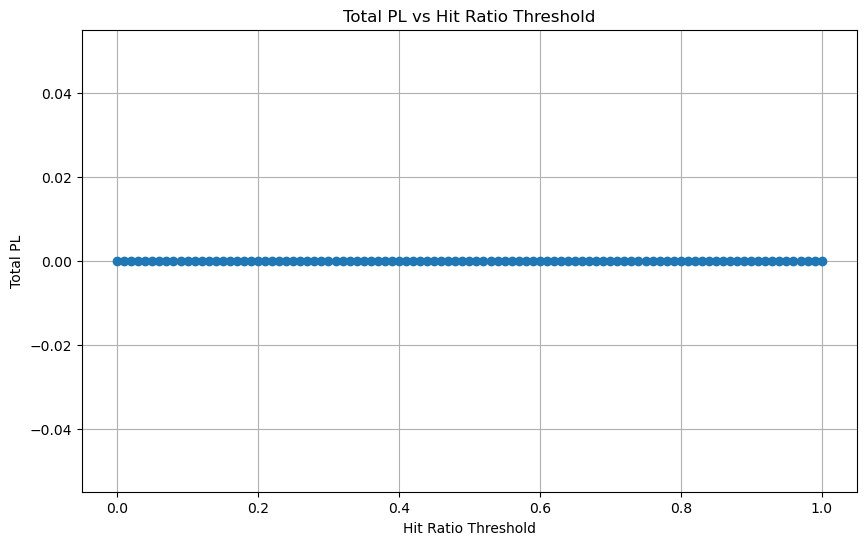

In [35]:
for cpty in data_OOS['Counterparty'].unique().tolist():
    print(cpty)
    sub_df = data_OOS[(data_OOS['Counterparty']==cpty)]
    total_PLs = []
    thresholds = np.arange(0, 1.01, 0.01)
    for threshold in thresholds:
        total_PLs.append(calc_total_PL(sub_df, threshold))

    max_PL = max(total_PLs)
    opt_threshold = thresholds[total_PLs.index(max_PL)]
    print(opt_threshold)
    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, total_PLs, marker='o')
    plt.xlabel('Hit Ratio Threshold')
    plt.ylabel('Total PL')
    plt.title('Total PL vs Hit Ratio Threshold')
    plt.grid(True)
    plt.show()

### Combination of Bond and Cpty

In [36]:
for comb in combinations:
    print(comb)
    sub_df = data_OOS[(data_OOS['Bond']==comb[0]) & (data_OOS['Counterparty']==comb[1])]
    total_PLs = []
    thresholds = np.arange(0, 1.01, 0.01)
    for threshold in thresholds:
        total_PLs.append(calc_total_PL(sub_df, threshold))

    max_PL = max(total_PLs)
    opt_threshold = thresholds[total_PLs.index(max_PL)]
    print(opt_threshold)
#     plt.figure(figsize=(10, 6))
#     plt.plot(thresholds, total_PLs, marker='o')
#     plt.xlabel('Hit Ratio Threshold')
#     plt.ylabel('Total PL')
#     plt.title('Total PL vs Hit Ratio Threshold')
#     plt.grid(True)
#     plt.show()

('Bond_2', 'Ctpy_1')
0.91
('Bond_2', 'Ctpy_0')
0.9500000000000001
('Bond_2', 'Ctpy_3')
1.0
('Bond_2', 'Ctpy_2')
0.0
('Bond_0', 'Ctpy_1')
0.52
('Bond_0', 'Ctpy_0')
1.0
('Bond_0', 'Ctpy_3')
1.0
('Bond_0', 'Ctpy_2')
0.0
('Bond_1', 'Ctpy_1')
0.93
('Bond_1', 'Ctpy_0')
1.0
('Bond_1', 'Ctpy_3')
0.76
('Bond_1', 'Ctpy_2')
0.0


## Competition

In [37]:
data_NEW = pd.read_excel(data, sheet_name=pd.ExcelFile(data).sheet_names[2])
data_NEW

Time    Bond   Side  Notional Counterparty  MidPrice  QuotedPrice  \
0  31001  Bond_0  Offer     60000       Ctpy_0    98.695          NaN   
1  31002  Bond_2    Bid      1000       Ctpy_3    65.820          NaN   
2  31015  Bond_0    Bid      1000       Ctpy_0    99.635          NaN   
3  31023  Bond_2  Offer    250000       Ctpy_0    67.180          NaN   
4  31033  Bond_0  Offer      1000       Ctpy_1    98.955          NaN   
5  31039  Bond_1    Bid  10000000       Ctpy_0   129.271          NaN   
6  31042  Bond_2    Bid     20000       Ctpy_1    66.650          NaN   
7  31044  Bond_0  Offer      1000       Ctpy_3    98.905          NaN   
8  31094  Bond_2  Offer      1000       Ctpy_1    66.370          NaN   
9  31099  Bond_0    Bid      1000       Ctpy_0    99.205          NaN   

   Competitors  Traded  NextMidPrice  PL  
0            1     NaN           NaN NaN  
1            3     NaN           NaN NaN  
2            1     NaN           NaN NaN  
3            4     NaN           NaN NaN  
4            4     NaN           NaN NaN  
5            3     NaN           NaN NaN  
6            3     NaN           NaN NaN  
7            4     NaN           NaN NaN  
8            4     NaN           NaN NaN  
9            3     NaN           NaN NaN

In [38]:
# encoder = fit_encoder(data_NEW)
data_NEW_processed = process_data(data_NEW, encoder)
data_NEW_processed

Competitors  Traded  Spread  Log Notional  Bond_Bond_1  Bond_Bond_2  \
0            1     NaN     NaN     11.002100          0.0          0.0   
1            3     NaN     NaN      6.907755          0.0          1.0   
2            1     NaN     NaN      6.907755          0.0          0.0   
3            4     NaN     NaN     12.429216          0.0          1.0   
4            4     NaN     NaN      6.907755          0.0          0.0   
5            3     NaN     NaN     16.118096          1.0          0.0   
6            3     NaN     NaN      9.903488          0.0          1.0   
7            4     NaN     NaN      6.907755          0.0          0.0   
8            4     NaN     NaN      6.907755          0.0          1.0   
9            3     NaN     NaN      6.907755          0.0          0.0   

   Counterparty_Ctpy_1  Counterparty_Ctpy_2  Counterparty_Ctpy_3  
0                  0.0                  0.0                  0.0  
1                  0.0                  0.0                  1.0  
2                  0.0                  0.0                  0.0  
3                  0.0                  0.0                  0.0  
4                  1.0                  0.0                  0.0  
5                  0.0                  0.0                  0.0  
6                  1.0                  0.0                  0.0  
7                  0.0                  0.0                  1.0  
8                  1.0                  0.0                  0.0  
9                  0.0                  0.0                  0.0

In [39]:
probs = []
spreads = np.arange(0,1.0,0.001)
selected_row = data_NEW.iloc[3]
replicated_data = pd.DataFrame([selected_row] * len(spreads), index=range(len(spreads)))
replicated_data_processed = process_data(replicated_data, encoder)
replicated_data_processed['Spread'] = spreads
replicated_data_processed
X = replicated_data_processed.drop(['Traded'], axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)
probs = model.predict_proba(X)[:,0]

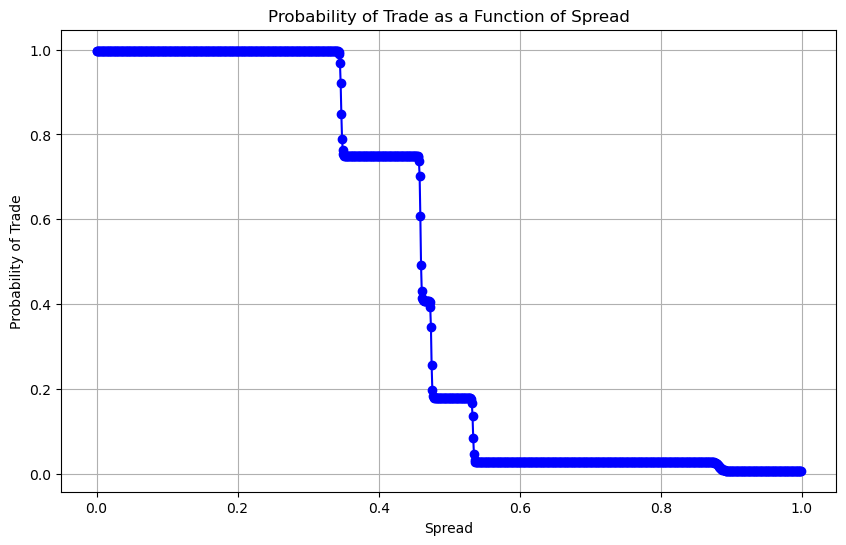

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(spreads, probs, '-o', color='blue')
plt.title('Probability of Trade as a Function of Spread')
plt.xlabel('Spread')
plt.ylabel('Probability of Trade')
plt.grid(True)
plt.show()

### Set Hit Ratio

In [41]:
data_NEW

Time    Bond   Side  Notional Counterparty  MidPrice  QuotedPrice  \
0  31001  Bond_0  Offer     60000       Ctpy_0    98.695          NaN   
1  31002  Bond_2    Bid      1000       Ctpy_3    65.820          NaN   
2  31015  Bond_0    Bid      1000       Ctpy_0    99.635          NaN   
3  31023  Bond_2  Offer    250000       Ctpy_0    67.180          NaN   
4  31033  Bond_0  Offer      1000       Ctpy_1    98.955          NaN   
5  31039  Bond_1    Bid  10000000       Ctpy_0   129.271          NaN   
6  31042  Bond_2    Bid     20000       Ctpy_1    66.650          NaN   
7  31044  Bond_0  Offer      1000       Ctpy_3    98.905          NaN   
8  31094  Bond_2  Offer      1000       Ctpy_1    66.370          NaN   
9  31099  Bond_0    Bid      1000       Ctpy_0    99.205          NaN   

   Competitors  Traded  NextMidPrice  PL  
0            1     NaN           NaN NaN  
1            3     NaN           NaN NaN  
2            1     NaN           NaN NaN  
3            4     NaN           NaN NaN  
4            4     NaN           NaN NaN  
5            3     NaN           NaN NaN  
6            3     NaN           NaN NaN  
7            4     NaN           NaN NaN  
8            4     NaN           NaN NaN  
9            3     NaN           NaN NaN

In [42]:
def set_hit_ratio(row):
    if row['Counterparty'] == 'Ctpy_0':
        return 0.79
    elif row['Counterparty'] == 'Ctpy_1':
        return 0.69
    elif row['Counterparty'] == 'Ctpy_2':
        return 0
    else:
        return 1

In [43]:
data_NEW['HitRatio'] = data_NEW.apply(set_hit_ratio, axis=1)
data_NEW

Time    Bond   Side  Notional Counterparty  MidPrice  QuotedPrice  \
0  31001  Bond_0  Offer     60000       Ctpy_0    98.695          NaN   
1  31002  Bond_2    Bid      1000       Ctpy_3    65.820          NaN   
2  31015  Bond_0    Bid      1000       Ctpy_0    99.635          NaN   
3  31023  Bond_2  Offer    250000       Ctpy_0    67.180          NaN   
4  31033  Bond_0  Offer      1000       Ctpy_1    98.955          NaN   
5  31039  Bond_1    Bid  10000000       Ctpy_0   129.271          NaN   
6  31042  Bond_2    Bid     20000       Ctpy_1    66.650          NaN   
7  31044  Bond_0  Offer      1000       Ctpy_3    98.905          NaN   
8  31094  Bond_2  Offer      1000       Ctpy_1    66.370          NaN   
9  31099  Bond_0    Bid      1000       Ctpy_0    99.205          NaN   

   Competitors  Traded  NextMidPrice  PL  HitRatio  
0            1     NaN           NaN NaN      0.79  
1            3     NaN           NaN NaN      1.00  
2            1     NaN           NaN NaN      0.79  
3            4     NaN           NaN NaN      0.79  
4            4     NaN           NaN NaN      0.69  
5            3     NaN           NaN NaN      0.79  
6            3     NaN           NaN NaN      0.69  
7            4     NaN           NaN NaN      1.00  
8            4     NaN           NaN NaN      0.69  
9            3     NaN           NaN NaN      0.79

In [44]:
data_NEW_processed = process_data(data_NEW, encoder)
X_NEW = data_NEW_processed.drop(['Traded'], axis=1)
X_NEW.drop(columns=['HitRatio'], inplace=True)
X_NEW

Competitors  Spread  Log Notional  Bond_Bond_1  Bond_Bond_2  \
0            1     NaN     11.002100          0.0          0.0   
1            3     NaN      6.907755          0.0          1.0   
2            1     NaN      6.907755          0.0          0.0   
3            4     NaN     12.429216          0.0          1.0   
4            4     NaN      6.907755          0.0          0.0   
5            3     NaN     16.118096          1.0          0.0   
6            3     NaN      9.903488          0.0          1.0   
7            4     NaN      6.907755          0.0          0.0   
8            4     NaN      6.907755          0.0          1.0   
9            3     NaN      6.907755          0.0          0.0   

   Counterparty_Ctpy_1  Counterparty_Ctpy_2  Counterparty_Ctpy_3  
0                  0.0                  0.0                  0.0  
1                  0.0                  0.0                  1.0  
2                  0.0                  0.0                  0.0  
3                  0.0                  0.0                  0.0  
4                  1.0                  0.0                  0.0  
5                  0.0                  0.0                  0.0  
6                  1.0                  0.0                  0.0  
7                  0.0                  0.0                  1.0  
8                  1.0                  0.0                  0.0  
9                  0.0                  0.0                  0.0

In [50]:
X_NEW_OPT = X_NEW.copy()
for index, row in X_NEW_OPT.iterrows():
    print('row', index, data_NEW.iloc[index]['Counterparty'])
    spreads = np.arange(0,1.0,0.01)
    data = pd.DataFrame([row] * len(spreads), index=range(len(spreads)))
    data['Spread'] = spreads
    X = data
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    probs = model.predict_proba(X)[:,0]
    index_satisfy = np.where(probs <= data_NEW.iloc[index]['HitRatio'])[0]
    if index_satisfy.size > 0:
        first_index = index_satisfy[0]
        print("spread:", spreads[first_index])
        spread = spreads[first_index]
        quoted_price = np.where(data_NEW.iloc[index]['Side'] == 'Bid', 
                                      (data_NEW.iloc[index]['MidPrice'] - spread), 
                                      (spread + data_NEW.iloc[index]['MidPrice']))
        data_NEW.at[index, 'QuotedPrice'] = quoted_price
    else:
        print("No valid quote using model, give a hard quote")

row 0 Ctpy_0
spread: 0.35000000000000003
row 1 Ctpy_3
spread: 0.0
row 2 Ctpy_0
spread: 0.35000000000000003
row 3 Ctpy_0
spread: 0.35000000000000003
row 4 Ctpy_1
spread: 0.46
row 5 Ctpy_0
spread: 0.35000000000000003
row 6 Ctpy_1
spread: 0.46
row 7 Ctpy_3
spread: 0.0
row 8 Ctpy_1
spread: 0.46
row 9 Ctpy_0
spread: 0.35000000000000003


In [51]:
data_NEW

Time    Bond   Side  Notional Counterparty  MidPrice  QuotedPrice  \
0  31001  Bond_0  Offer     60000       Ctpy_0    98.695       99.045   
1  31002  Bond_2    Bid      1000       Ctpy_3    65.820       65.820   
2  31015  Bond_0    Bid      1000       Ctpy_0    99.635       99.285   
3  31023  Bond_2  Offer    250000       Ctpy_0    67.180       67.530   
4  31033  Bond_0  Offer      1000       Ctpy_1    98.955       99.415   
5  31039  Bond_1    Bid  10000000       Ctpy_0   129.271      128.921   
6  31042  Bond_2    Bid     20000       Ctpy_1    66.650       66.190   
7  31044  Bond_0  Offer      1000       Ctpy_3    98.905       98.905   
8  31094  Bond_2  Offer      1000       Ctpy_1    66.370       66.830   
9  31099  Bond_0    Bid      1000       Ctpy_0    99.205       98.855   

   Competitors  Traded  NextMidPrice  PL  HitRatio  
0            1     NaN           NaN NaN      0.79  
1            3     NaN           NaN NaN      1.00  
2            1     NaN           NaN NaN      0.79  
3            4     NaN           NaN NaN      0.79  
4            4     NaN           NaN NaN      0.69  
5            3     NaN           NaN NaN      0.79  
6            3     NaN           NaN NaN      0.69  
7            4     NaN           NaN NaN      1.00  
8            4     NaN           NaN NaN      0.69  
9            3     NaN           NaN NaN      0.79

## Generate spread, to produce the final quoted price

In [73]:
data_full = pd.concat([data_IS, data_OOS], axis=0)
data_full.index = data_full['Time']
data_full.tail()

Time    Bond   Side  Notional Counterparty  MidPrice  QuotedPrice  \
Time                                                                        
30995  30995  Bond_1    Bid  10000000       Ctpy_0   130.341      130.321   
30996  30996  Bond_1  Offer      1000       Ctpy_0   130.161      130.221   
30997  30997  Bond_1  Offer      1000       Ctpy_0   130.161      130.271   
30998  30998  Bond_0    Bid      1000       Ctpy_1    98.715       98.695   
30999  30999  Bond_2    Bid  10000000       Ctpy_0    66.420       66.380   

       Competitors  Traded  NextMidPrice         PL  HitRatio  
Time                                                           
30995            2    DONE       130.161 -1600000.0  0.971762  
30996            3  MISSED       130.161        0.0  0.125996  
30997            4  MISSED       130.051        0.0  0.014100  
30998            4    DONE        98.685      -10.0  0.918860  
30999            4    DONE        66.040 -3400000.0  0.900980

Bond_0
z score of (fast window - slow window) 0.1776
the higher the more likely to increase; the lower the more likely to decrease


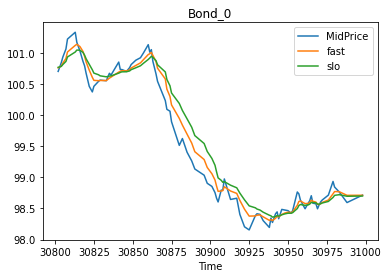

Bond_1
z score of (fast window - slow window) -0.4684
the higher the more likely to increase; the lower the more likely to decrease


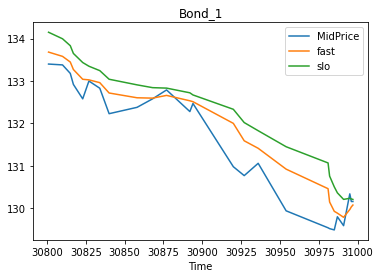

Bond_2
z score of (fast window - slow window) 0.7736
the higher the more likely to increase; the lower the more likely to decrease


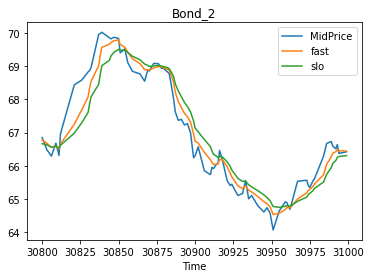

In [75]:
# Generate view using moving averages of bond prices
bond_list = ['Bond_0', 'Bond_1', 'Bond_2']
for bond in bond_list:
    print(bond)
    df_b = data_full[data_full['Bond'] == bond]
    df_b['Mid_Price_1'] = df_b['NextMidPrice'].shift(1)
    df_b['ret'] = np.log(df_b['MidPrice']/df_b['MidPrice'].shift(1))

    win_list = [2]
    for f_win in win_list:
        df_sma = df_b[['MidPrice']].copy()
        s_win = 2*f_win
        df_sma['fast'] = df_sma['MidPrice'].ewm(f_win).mean()
        df_sma['slo'] = df_sma['MidPrice'].ewm(s_win).mean()
        df_sma['diff'] = df_sma['fast'] - df_sma['slo']
        df_sma['z'] = (df_sma['diff'] - df_sma['diff'].mean())/df_sma['diff'].std()

    # df_sma[['MidPrice','fast', 'slo']].plot()
    df_sma[['MidPrice','fast', 'slo']].loc[30800:].plot()
    last_z = df_sma['z'].iloc[-1]
    plt.title(bond)
    print(f'z score of (fast window - slow window) {round(last_z,4)}')
    print('the higher the more likely to increase; the lower the more likely to decrease')       
    plt.show()